In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#Change file path of csv to be loaded
file='BGD_30_06_18_Nezgode.csv'
#Loading csv file
col_hed=['id','datum','Lon','Lat','Steta','Vrsta','Opis']
data=pd.read_csv(file, sep=';', header=None, names=col_hed, parse_dates=['datum'], decimal=',', dayfirst=True)


Steta
Sa mat.stetom     6585
Sa poginulim        47
Sa povredjenim    2213
Name: id, dtype: int64


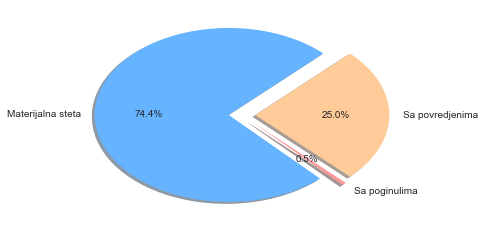

In [3]:
#Grouping data by concequences of car accident
steta=data.groupby(by='Steta')['id'].count()

plt.pie(steta, explode=(0.1,0.1,0.1), labels=['Materijalna steta','Sa poginulima', 'Sa povredjenima'], autopct='%1.1f%%',
        shadow=True, startangle=45, colors=['#66b3ff','#ff9999','#ffcc99'])
print(steta)

In [4]:
#Adding column with color for steta
d = {'Sa mat.stetom': 'yellow', 'Sa povredjenim': 'orange', 'Sa poginulim': 'blue'}
data['boja']=data['Steta'].map(d)

Vrsta
SN SA JEDNIM VOZILOM                                  1247
SN SA NAJMANjE DVA VOZILA – BEZ SKRETANjA             3265
SN SA NAJMANjE DVA VOZILA – SKRETANjE ILI PRELAZAK    2187
SN SA PARKIRANIM VOZILIMA                             1610
SN SA PEŠACIMA                                         536
Name: id, dtype: int64


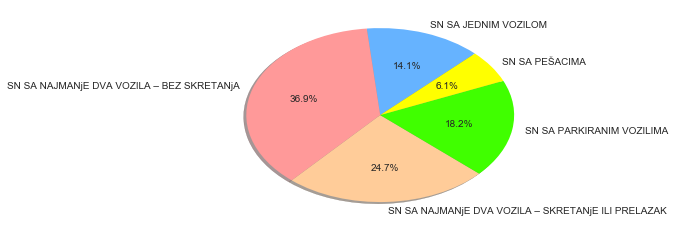

In [5]:
vrsta=data.groupby(by='Vrsta')['id'].count()
labels_v=data.Vrsta.unique()
labels_v.sort()
plt.pie(vrsta,  autopct='%1.1f%%',
        shadow=True, startangle=45, labels=labels_v, colors=['#66b3ff','#ff9999','#ffcc99','#40ff00', '#ffff00'])
print(vrsta)

In [6]:
#Drawing map of car accidents in Belgrade - first half of 2018 grouped by concequences
lokacije = data[['Lat','Lon']]
lokacije_lista = lokacije.values.tolist()
#Converting color column of data frame to list
color=data['boja'].values.tolist()

map = folium.Map(location=[44.819729,20.4664466], tiles='Stamen Toner', zoom_start=12)
for tacka in range(0, len(data)):
    folium.CircleMarker(lokacije_lista[tacka], radius=3, color=color[tacka], fill=True, fill_color=color[tacka], opacity = 0.3).add_to(map)
map

In [7]:

map.save('map_car_bg_2018.html')

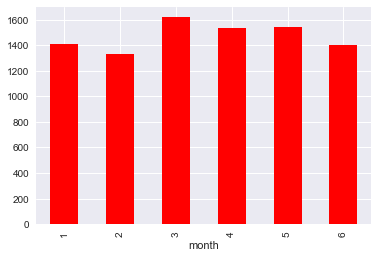

In [8]:
data['month']=data['datum'].dt.month
mesecno=data.groupby(by='month')['id'].count()

mesecno.plot(kind='bar', color='red')


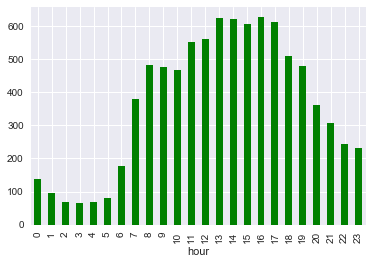

In [9]:
data['hour']=data['datum'].dt.hour
po_satu=data.groupby(by='hour')['id'].count()

po_satu.plot(kind='bar', color='green')

Text(0.5,1,'Number of Car Accidents by Hour in the Months')

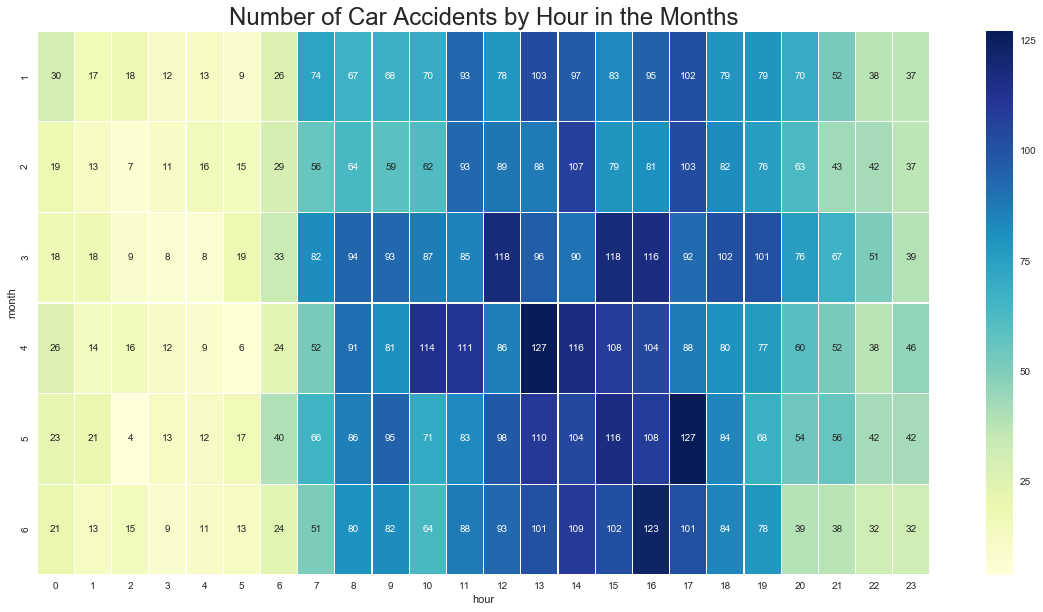

In [33]:
#Creating cross view of month per hour for creating heatmap and see what month has the hours with the most number of car accidents
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax=sns.heatmap(pd.crosstab(data['month'],data['hour'], values=data['id'], aggfunc='count').round(2),cmap="YlGnBu", annot=True, fmt='d', linewidths=0.4 )
ax.set_title('Number of Car Accidents by Hour in the Months',fontsize=24)

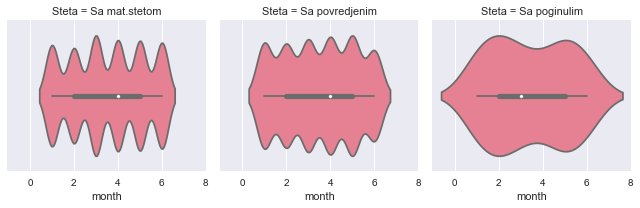

In [47]:
g2 = sns.FacetGrid(data, col="Steta", row_order=['Sa poginulim','Sa povredjenim', 'Sa mat.stetom'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.violinplot, 'month', order=[1,2,3,4,5,6])